## **Machine learning Project**
### By **Thomas Marchal** #20220714, **Louis Hislaire** #  and **Jules Rougier** #20220748 


Step 1:
We choose the Dataset number D : House_data


Step 2: Scenario / About Dataset 

In this project, we chose to study a dataset about housing data. That includes numerical informations about the house (size, age, rooms, etc...), General information such as if the house is waterfront and of course the price of the house.
Using this information we can guess a few possible scenarios and choose one to study for the project.
 

<h5 style="margin-bottom: 0;"><b>Explanation:</b></h5>
<p>The target variable in this dataset is most likely price, which is a continuous numeric value. Since regression is used to predict continuous values, this points to a regression problem.</p>

<p>However, clustering could also be relevant if the goal is to group similar properties together based on features such as sqft_living, bedrooms, and bathrooms, without focusing directly on predicting price. In that case, clustering would aim to identify groups or clusters of similar houses based on these characteristics.</p>

<h5 style="margin-bottom: 0;"><b>Conclusion:</b></h5>
<p>The project could tackle a regression problem if the goal is to predict price, or a clustering problem if the goal is to group similar properties based on their features. In this project, we will be focusing on price estimation using regression techniques.</p>


Step 3: Data Loading -> Thomas


In [18]:
# Load required librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
#Load the data
df = pd.read_csv("data/House_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Step 4: Data Wrangling or Data Pre-processing -> Louis

We will make the pre-processing of the data in order to be used properly in our different models.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21600 non-null  float64
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We saw with the info function here that there are missing values in the bedrooms and bathrooms data.

We will use a module from Sklearn named SimpleImputer, that can fill missing data using a strategy. We will here use the mean strategy which will fill the missing data with the mean of the available data.

We have numerical values for all the values despite for the date.

For the numerical values, we will use a module given by the Sklearn library to scale the data by removing the mean and scaling to unit variance.

For the categorical date, we will also use a module of Sklearn, OrdinalEncoder, that encodes categorical features as an array of integers.

In [ ]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("ordinal", OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_pipeline, numerical_features),
        ("cat", categorical_pipeline, categorical_features)
    ],
    remainder="passthrough"
)

processed_data = preprocessor.fit_transform(df)

encoded_cat_cols = preprocessor.named_transformers_["cat"]["ordinal"].get_feature_names_out(categorical_features)
all_columns = list(numerical_features) + list(encoded_cat_cols)

processed_df = pd.DataFrame(processed_data, columns=all_columns)

processed_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date
0,0.886146,-0.866717,-0.402513,-1.451270,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,...,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715,164.0
1,0.637511,-0.005688,-0.402513,0.174641,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,...,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868,220.0
2,0.365444,-0.980849,-1.482011,-1.451270,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,...,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375,290.0
3,-0.727656,0.174090,0.676985,1.150187,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,...,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522,220.0
4,-0.912881,-0.081958,-0.402513,-0.150541,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,...,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849,283.0


In [22]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  float64
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  float64
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  float64
 5   sqft_lot       21613 non-null  float64
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  float64
 8   view           21613 non-null  float64
 9   condition      21613 non-null  float64
 10  grade          21613 non-null  float64
 11  sqft_above     21613 non-null  float64
 12  sqft_basement  21613 non-null  float64
 13  yr_built       21613 non-null  float64
 14  yr_renovated   21613 non-null  float64
 15  zipcode        21613 non-null  float64
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

The data is ready for our models !

Step 5: Exploratory Data Analysis -> Thomas

Step 6: Model Developement (Apply ML algorithms)
BONUS if we choose to use 2ML algorithms (see pdf) 1 normal + 2 dans les Bonus
Thomas/Louis/Jules

<h1>Model #1: Random Forest Regressor</h1>

<h3>Basic Concept</h3>

The model consists of a "forest" of **decision trees**, which are hierarchical structures that split data into branches based on conditions. For example, a node in the tree might split data on an "age" feature into two branches: *< 60 years* and *≥ 60 years*.

Each decision tree attempts to predict the target variable (in this case, house prices) by recursively splitting the data based on the feature that best explains the target at each step. For regression problems, trees aim to minimize the **variance** within each split.

<h3>Why do we use a forest instead of a single tree?</h3>

A single decision tree can be effective but is prone to **overfitting**, meaning it might fit the training data too closely and perform poorly on new, unseen data. Each tree is trained on a random subset of the data and the final prediction is typically the average of the predictions from all trees, making the model more stable and robust.

<h3>In our case</h3>

For predicting house prices, each tree in the forest is trained on random subsets of the training data to learn the relationships between the features of a house (e.g., size, age, number of rooms) and its price. Once the trees are trained, the Random Forest combines their predictions (by averaging) to produce a final estimate of the house price. This approach ensures more reliable and accurate predictions compared to a single decision tree.

In [ ]:

X = processed_df.drop('price', axis=1)
y = processed_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.19810681420459417
Mean Squared Error: 0.16597774359269435


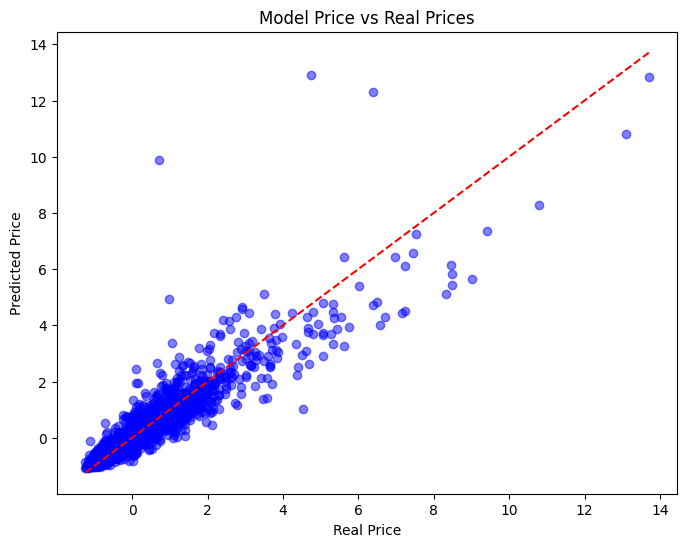

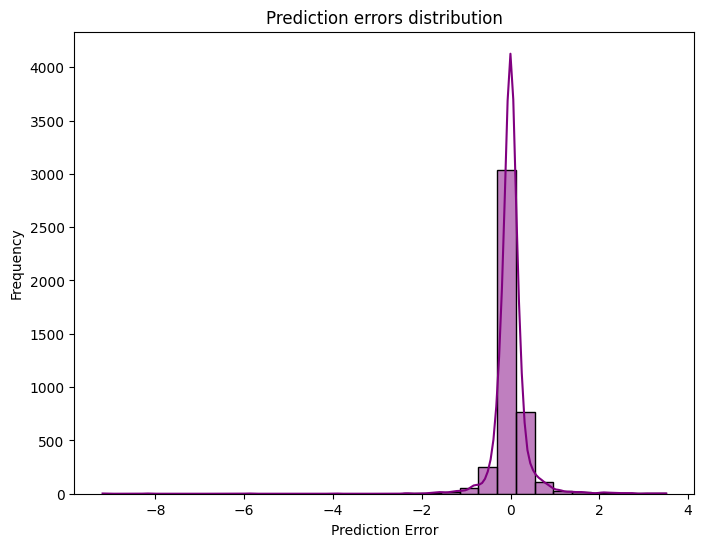

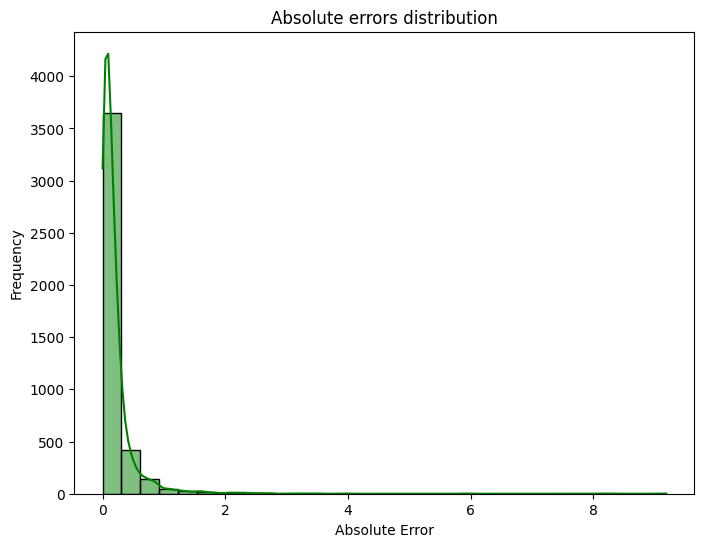

In [24]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')
plt.title('Model Price vs Real Prices')
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='purple', bins=30)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction errors distribution')
plt.show()

abs_errors = np.abs(errors)
plt.figure(figsize=(8, 6))
sns.histplot(abs_errors, kde=True, color='green', bins=30)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Absolute errors distribution')
plt.show()

Step 7: Model Evaluation, Implement and compare different metrics to evaluate the quality of the model.
Chaque model Thomas/Louis/Jules

Step 8: Model Refinement -> Jules

Harmoniser le doc pour le rendu